In [1]:
# Imports
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import onnxmltools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import pandas as pd


2022-10-18 00:57:17.333491: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-18 00:57:17.881229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-18 00:57:17.881324: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 00:57:17.967853: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-18 00:57:19.958340: W tensorflow/stream_executor/platform/de

In [19]:
#"""
# Model 1
# source: https://medium.com/geekculture/steganography-and-steganalaysis-with-cnn-9bd738dfed6f
model = Sequential()
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(200,200,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
#"""

"""
# MODEL 2
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
"""

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                      

"\n# MODEL 2\nmodel = Sequential()\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Conv2D(32, (3,3), activation = 'relu'))\nmodel.add(MaxPooling2D((2,2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(64, activation = 'relu'))\nmodel.add(Dense(1, activation = 'sigmoid'))\n\nmodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])\n"

In [15]:
# Loading data
data_dir = './data'
imgs = {}
for image_class in os.listdir(data_dir):
    imgs[image_class] = {}
    for image in os.listdir(os.path.join(data_dir, image_class)):
        im = cv2.imread(os.path.join(data_dir, image_class, image))
        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        imgs[image_class][image] = im
imgs['Cover']['00045.jpg'][0]


array([108,  99, 113, 113, 116, 118, 127, 127, 130, 126, 128, 108, 107,
       107, 123,  95, 143, 141, 130, 137, 117, 101, 144, 138, 137, 124,
       141, 129, 139, 132, 132, 143, 142, 121, 117, 149, 147, 142, 124,
       147, 145, 136, 146, 151, 150, 148, 136, 146, 131, 153, 152, 145,
       106, 137, 140, 124, 132, 149, 124, 143, 138, 138, 151, 146, 145,
       121, 150, 150, 154, 135, 154,  91, 146, 135, 113, 141, 122, 142,
       146, 157, 157, 155, 154, 155, 155, 156, 157, 158, 151, 160, 146,
       150, 124, 104, 128, 152, 148, 153, 160, 160], dtype=uint8)

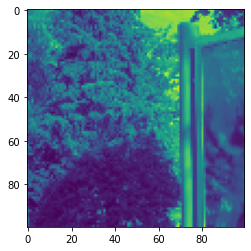

In [16]:
plt.imshow(imgs['Cover']['00001.jpg'])


In [17]:
# Training
size = len(imgs['Cover'])
X = []
Y = []
for img in sorted(imgs['Cover'].keys()):
    img_number = int(img.split('.')[0])
    if img_number < size/2:
        X.append(imgs['Cover'][img])
        Y.append(0)
    else:
        X.append(imgs['JMiPOD'][img])
        Y.append(1)

In [18]:
X = np.array(X)
Y = np.array(Y)


In [7]:
Y.shape

(921,)

In [13]:
model.fit(X, Y, epochs = 5, batch_size = 64)


Epoch 1/5
15/15 [==============================] - 10s 566ms/step - loss: 0.2705
Epoch 2/5
15/15 [==============================] - 9s 582ms/step - loss: 0.2527
Epoch 3/5
15/15 [==============================] - 9s 565ms/step - loss: 0.2460
Epoch 4/5
15/15 [==============================] - 9s 588ms/step - loss: 0.2383
Epoch 5/5
15/15 [==============================] - 9s 590ms/step - loss: 0.2308


In [9]:
model.save('./model')
onnx_model = onnxmltools.convert_keras(model)
onnxmltools.utils.save_model(onnx_model, './model/model.onnx')


INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`


2022-10-18 00:58:22.673275: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-18 00:58:22.673692: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-10-18 00:58:22.847662: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2022-10-18 00:58:22.848050: I tensorflow/core/grappler/clusters/single_machine.cc:358] Starting new session


In [10]:
x = np.array(imgs['Cover']['00097.jpg']).reshape(1, 200, 200, 3)
model.predict(x)


1/1 [==============================] - 0s 208ms/step


array([[0.50137967]], dtype=float32)

In [11]:
x = np.array(imgs['JMiPOD']['00096.jpg']).reshape(1, 200, 200, 3)
model.predict(x)

1/1 [==============================] - 0s 53ms/step


array([[0.50137967]], dtype=float32)